# Analyzing Titanic Disaster using Machine Learning Algorithms

### Exploratory Data Analysis 

As it's the first step of any Data Science project, let's do some EDA!

In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing modules first
import pandas as pd
import numpy as np
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
df= pd.read_excel('titanic3.xls')

In [5]:
# Let's check the shape of the dataframe
df.shape

(1309, 14)

In [6]:
# Lets check the first 5 rows and see what the data looks like
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
# List of all the columns
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([500. , 530.9, 561.8, 592.7, 623.6, 654.5, 685.4, 716.3, 747.2,
        778.1, 809. ]),
 <a list of 10 Patch objects>)

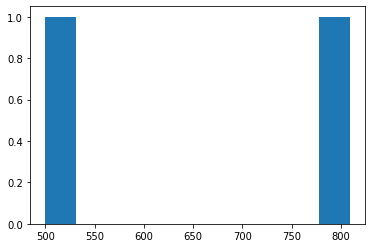

In [9]:
plt.hist(df.survived.value_counts(), )
plt.xlabel

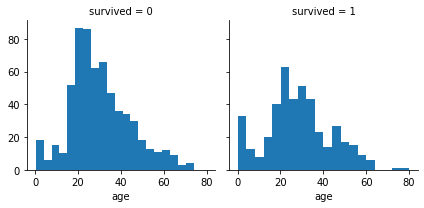

In [16]:
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)

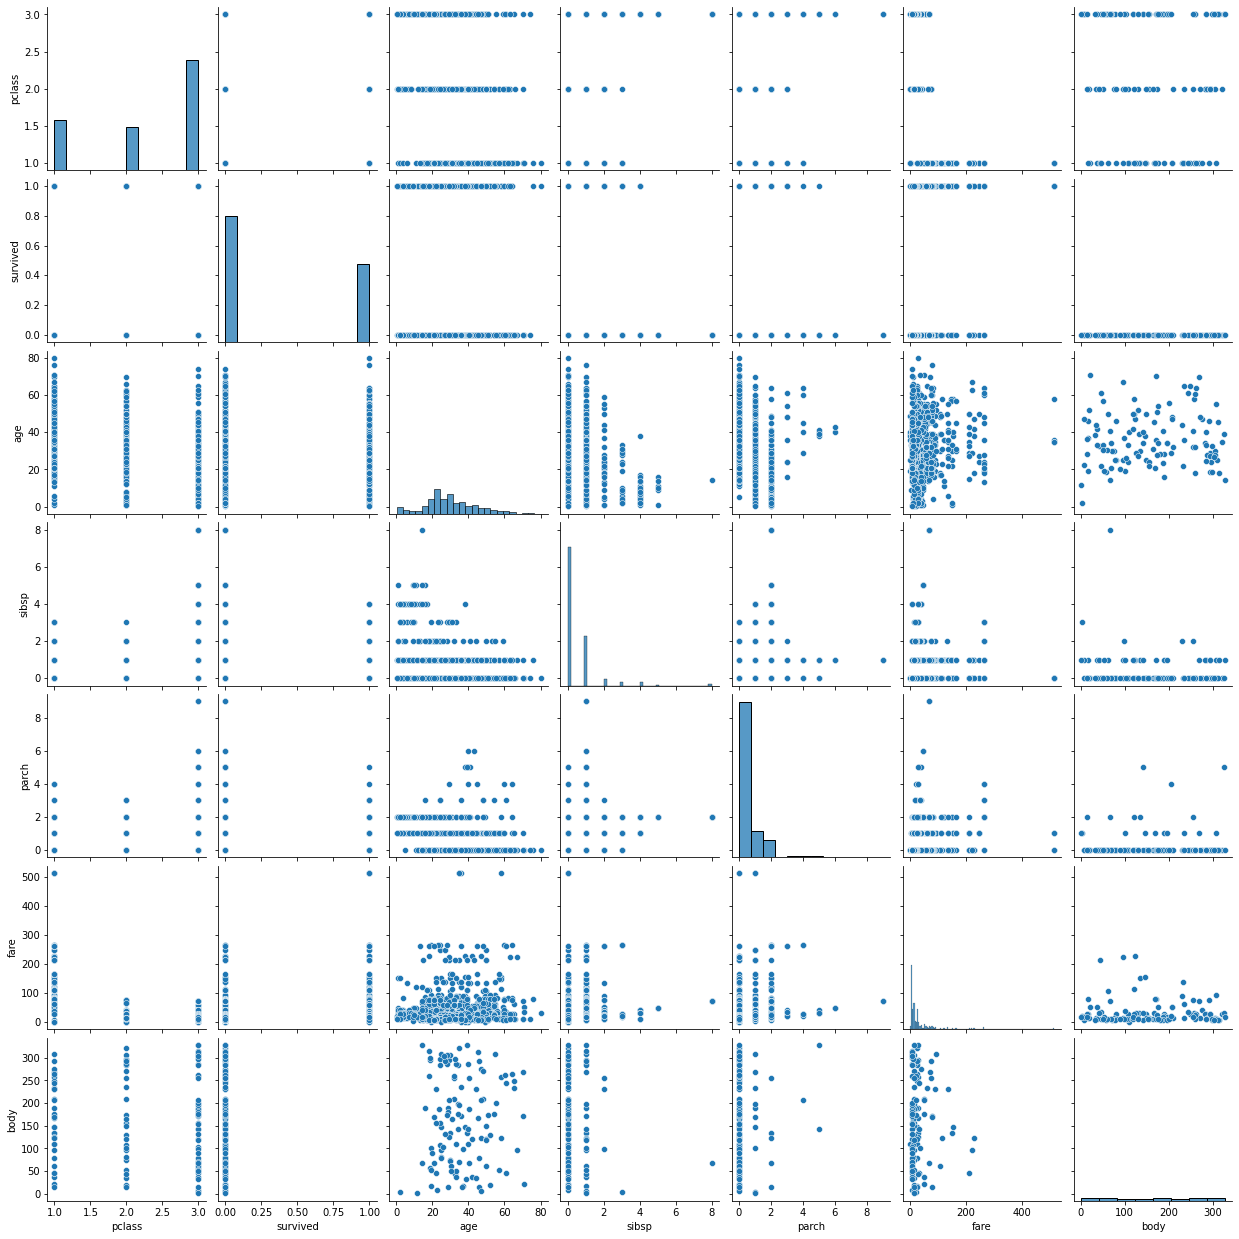

In [17]:
sns.pairplot(df)

In [19]:
# Statistical data about mean and fare, two numerical features in our data
df.loc[:,['age','fare']].describe()

,age,fare
count,1046.000000,1308.000000
mean,29.881135,33.295479
std,14.413500,51.758668
min,0.166700,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


In [48]:
# info about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [49]:
# Let's check the null values for each feature
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [20]:
# We can ignore cabin, boat, body, home_dest
df.drop(['cabin','boat','body','home.dest'], axis=1, inplace= True)

In [21]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C


In [22]:
df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

As we can see there are still null values. Let's replace them instead of deleting them. We replace age and fare with average values and embarked with the most common value

In [23]:
df['age'].fillna(df.age.mean(), inplace=True)

In [24]:
df['fare'].fillna(df.fare.mean(), inplace= True)

In [25]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [26]:
df.embarked.fillna(value= 'S', inplace=True)

In [27]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

So all the null values have been cleared or replaced

In [29]:
# Storing dummy variables for categorical data and deleting unncessary columns
#https://towardsdatascience.com/kaggles-titanic-competition-in-10-minutes-part-ii-3ae626bc6519


d = {1:'1st',2:'2nd',3:'3rd'} 
df['pclass'] = df['pclass'].map(d)
df.drop(['name', 'ticket'], 1, inplace= True)
cats = df[['pclass','sex','embarked']]
dummies = pd.get_dummies(cats,drop_first=True)
df.drop(['pclass','sex','embarked'], axis=1, inplace= True)
df = pd.concat([df,dummies],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [30]:
df.head()

,survived,age,sibsp,parch,fare,pclass_2nd,pclass_3rd,sex_male,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,0,0,0,0,1
1,1,0.9167,1,2,151.5500,0,0,1,0,1
2,0,2.0000,1,2,151.5500,0,0,0,0,1
3,0,30.0000,1,2,151.5500,0,0,1,0,1
4,0,25.0000,1,2,151.5500,0,0,0,0,1


Let's create Train and test sets

In [31]:
from sklearn.model_selection import train_test_split
X= df.drop('survived', axis=1)
t= df['survived']
X_train, X_test, t_train, t_test = train_test_split( X,t,train_size= 0.8)

In [32]:
# Naive Bayes
nb= GaussianNB()
nb.fit(X_train,t_train)
train_score= nb.score(X_train, t_train)
test_score= nb.score(X_test, t_test)
y_test= nb.predict(X_test)
print(f"Train Score:{train_score}")
print(f'Test Score:{test_score}')


Train Score:0.7860553963705826
Test Score:0.7786259541984732


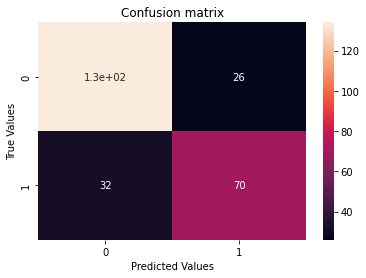

Classification Report


:               precision    recall  f1-score   support

           0       0.84      0.81      0.82       166
           1       0.69      0.73      0.71        96

    accuracy                           0.78       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.78      0.78      0.78       262



In [33]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(t_test,y_test)
report = classification_report(y_test, t_test)
cm = sns.heatmap(cf_matrix, annot=True)
cm.set_title("Confusion matrix");
cm.set_xlabel("Predicted Values")
cm.set_ylabel("True Values")
plt.show()
print(f"Classification Report\n\n\n: {report}")

In [34]:
# Logistic Regression ( Referred to class notebooks)

logreg= Pipeline([('scaler', StandardScaler()), 
                ('classifier', LogisticRegression(random_state=0))])
logreg.fit(X_train, t_train)
train_score= logreg.score(X_train, t_train)
test_score= logreg.score(X_test, t_test)
y_test= logreg.predict(X_test)
print(f"Train Score:{train_score}")
print(f'Test Score:{test_score}')

Train Score:0.7870105062082139
Test Score:0.7938931297709924


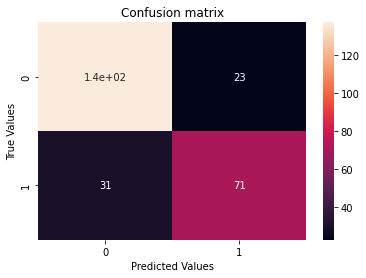

Classification Report:


               precision    recall  f1-score   support

           0       0.86      0.82      0.84       168
           1       0.70      0.76      0.72        94

    accuracy                           0.79       262
   macro avg       0.78      0.79      0.78       262
weighted avg       0.80      0.79      0.80       262



In [35]:
cf_matrix= confusion_matrix(t_test,y_test)
report = classification_report(y_test, t_test)
cm = sns.heatmap(cf_matrix, annot=True)
cm.set_title("Confusion matrix");
cm.set_xlabel("Predicted Values")
cm.set_ylabel("True Values")
plt.show()
print(f"Classification Report:\n\n\n {report}")

In [36]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, t_train)
train_score= rf.score(X_train, t_train)
test_score= rf.score(X_test, t_test)
y_test = cross_val_predict(rf, X_test, t_test, cv=4)
print(f"Train Score:{train_score}")
print(f'Test Score:{test_score}')

Train Score:0.9742120343839542
Test Score:0.7442748091603053


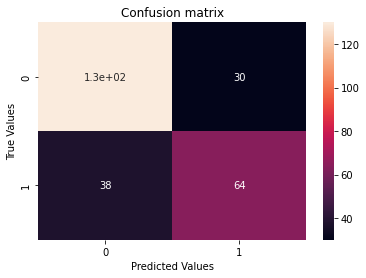

Classification Report:


               precision    recall  f1-score   support

           0       0.81      0.77      0.79       168
           1       0.63      0.68      0.65        94

    accuracy                           0.74       262
   macro avg       0.72      0.73      0.72       262
weighted avg       0.75      0.74      0.74       262



In [37]:
cf_matrix= confusion_matrix(t_test,y_test)
report = classification_report(y_test, t_test)
cm = sns.heatmap(cf_matrix, annot=True)
cm.set_title("Confusion matrix");
cm.set_xlabel("Predicted Values")
cm.set_ylabel("True Values")
plt.show()
print(f"Classification Report:\n\n\n {report}")

In [38]:
# Decision Tree Classifier
dt= DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, t_train)
y_test = cross_val_predict(dt, X_test, t_test, cv=4)
train_score= dt.score(X_train, t_train)
test_score= dt.score(X_test, t_test)

print(f"Train Score:{train_score}")
print(f'Test Score:{test_score}')

Train Score:0.8319006685768864
Test Score:0.7786259541984732


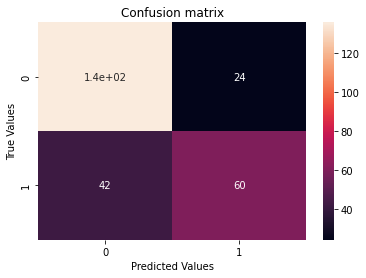

Classification Report:


               precision    recall  f1-score   support

           0       0.85      0.76      0.80       178
           1       0.59      0.71      0.65        84

    accuracy                           0.75       262
   macro avg       0.72      0.74      0.72       262
weighted avg       0.77      0.75      0.75       262



In [39]:
cf_matrix= confusion_matrix(t_test,y_test)
report = classification_report(y_test, t_test)
cm = sns.heatmap(cf_matrix, annot=True)
cm.set_title("Confusion matrix");
cm.set_xlabel("Predicted Values")
cm.set_ylabel("True Values")
plt.show()
print(f"Classification Report:\n\n\n {report}")